# Mengimport Libary yang diperlukan

In [2]:
!pip install kneed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Mengambil Data Set

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jhnwlkn/Bangkit/main/submission/data/airquality_data_aotizhongxin.csv")
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Datetime
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28 19:00:00
35060,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28 20:00:00
35061,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28 21:00:00
35062,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28 22:00:00


kita cari info dari data csv tersebut

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PM2.5     34139 non-null  float64
 1   PM10      34346 non-null  float64
 2   SO2       34129 non-null  float64
 3   NO2       34041 non-null  float64
 4   CO        33288 non-null  float64
 5   O3        33345 non-null  float64
 6   TEMP      35044 non-null  float64
 7   PRES      35044 non-null  float64
 8   DEWP      35044 non-null  float64
 9   RAIN      35044 non-null  float64
 10  wd        34983 non-null  object 
 11  WSPM      35050 non-null  float64
 12  station   35064 non-null  object 
 13  Datetime  35064 non-null  object 
dtypes: float64(11), object(3)
memory usage: 3.7+ MB


kita liat masing masing transpari datanya bagaimana dengan menggunakan describe dan transpose

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,34139.0,82.773611,82.135694,3.0000,22.0,58.0,114.0,898.0
PM10,34346.0,110.060391,95.223005,2.0000,38.0,87.0,155.0,984.0
SO2,34129.0,17.375901,22.823017,0.2856,3.0,9.0,21.0,341.0
NO2,34041.0,59.305833,37.116200,2.0000,30.0,53.0,82.0,290.0
CO,33288.0,1262.945145,1221.436236,100.0000,500.0,900.0,1500.0,10000.0
O3,33345.0,56.353358,57.916327,0.2142,8.0,42.0,82.0,423.0
TEMP,35044.0,13.584607,11.399097,-16.8000,3.1,14.5,23.3,40.5
PRES,35044.0,1011.846920,10.404047,985.9000,1003.3,1011.4,1020.1,1042.0
DEWP,35044.0,3.123062,13.688896,-35.3000,-8.1,3.8,15.6,28.5
RAIN,35044.0,0.067421,0.910056,0.0000,0.0,0.0,0.0,72.5


Kita liat apakah data itu ada nilai NaN nya

In [7]:
df.isna().sum()

PM2.5        925
PM10         718
SO2          935
NO2         1023
CO          1776
O3          1719
TEMP          20
PRES          20
DEWP          20
RAIN          20
wd            81
WSPM          14
station        0
Datetime       0
dtype: int64

Karena banyak NaN nya, maka nilai yang tidak ada kita drop NaN nya

In [8]:
df= df.dropna()
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Datetime
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28 19:00:00
35060,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28 20:00:00
35061,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28 21:00:00
35062,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28 22:00:00


drop data station, Datetime, ws

In [9]:
df_clean = df.drop(['station', 'Datetime', 'wd'], axis=1)

In [10]:
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_clean)

# Modeling

4.1546574774596525


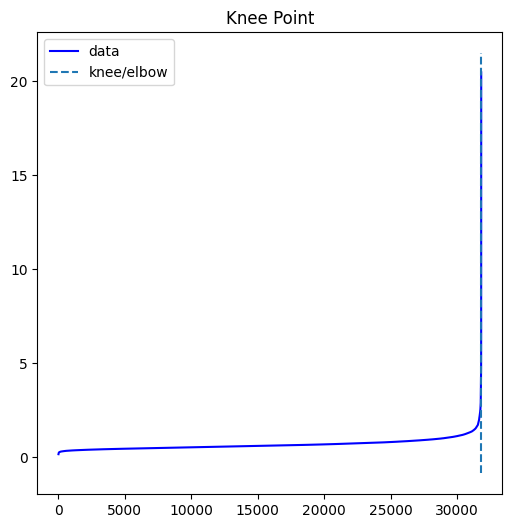

In [11]:
nbrs = NearestNeighbors().fit(scaled_data)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 4]
kneedle = KneeLocator(x=range(1,len(neigh_dist)+1), y= k_dist, S=1.0, curve="concave", direction="increasing", online=True)
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

In [12]:
clusters = DBSCAN(eps=2, min_samples=4).fit(scaled_data)
label = clusters.labels_
np.unique(label)

array([-1,  0,  1,  2,  3,  4])

<ipython-input-13-022dd7039a83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_clusters']=label


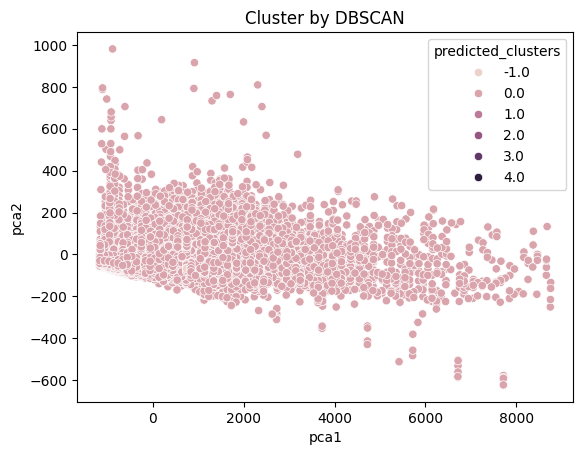

In [13]:
df['predicted_clusters']=label

reduced_data = PCA(n_components=2).fit_transform(df_clean)
df_reduced_data = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
sns.scatterplot(x='pca1', y='pca2',hue=df['predicted_clusters'], data=df_reduced_data)
plt.title("Cluster by DBSCAN")
plt.show()

In [14]:
Z = df_clean.copy()

In [15]:
ss = silhouette_score(Z, label)
print(f"Akurasi berdasarkan silhoutte score adalah : {ss} ")

Akurasi berdasarkan silhoutte score adalah : -0.48407726737560586 


In [16]:
sc = calinski_harabasz_score(Z,label)
print(f"Caliski score yang didapat adalah :{sc}")

Caliski score yang didapat adalah :11.453356754977372


In [17]:
sd = davies_bouldin_score(Z,label)
print(f"Davies score yang didapat adalah :{sd}")

Davies score yang didapat adalah :2.793338928932863
